In [1]:
# !pip install tensorflow
# !pip install keras

In [22]:
# !pip install ipython-autotime
# %load_ext autotime

In [23]:
# Edit -> Notebook settings -> Hardware accelerator -> GPU

In [27]:
# !df -h

In [28]:
# !cat /proc/cpuinfo

In [29]:
# !cat /proc/meminfo

# MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

# Загрузка датасета MNIST
(x_train, y_train), (X_test, y_test) = mnist.load_data()

# Пример использования данных
print('Размеры обучающей выборки:', x_train.shape, y_train.shape)
print('Размеры тестовой выборки:', X_test.shape, y_test.shape)

Размеры обучающей выборки: (60000, 28, 28) (60000,)
Размеры тестовой выборки: (10000, 28, 28) (10000,)


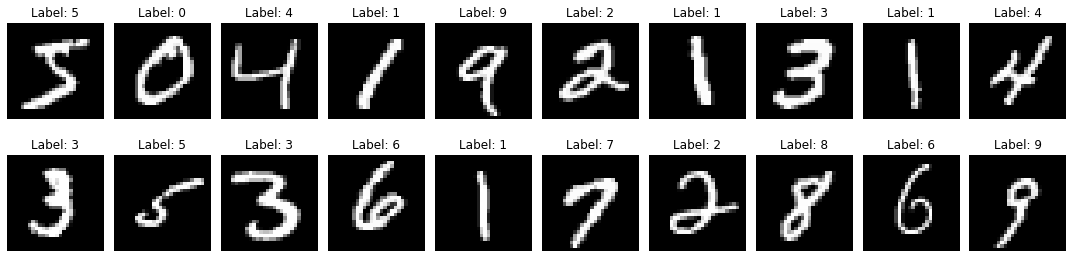

In [3]:
import matplotlib.pyplot as plt

# Создание сетки для визуализации
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

# Заполнение сетки изображениями и метками
for i, ax in enumerate(axes.flat):
    image = x_train[i]
    label = y_train[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Решение задачи классическими алгоритмами

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
import pandas as pd

# Конвертация в Pandas DataFrame
x_train = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
y_train = pd.Series(y_train)

X_test = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))
y_test = pd.Series(y_test)

In [6]:
# Вывод датасета
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Масштабирование данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)

In [8]:
# Обучение логистической регрессии
clf = LogisticRegression(max_iter=1000, n_jobs=-1)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [9]:
# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

In [10]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.9211


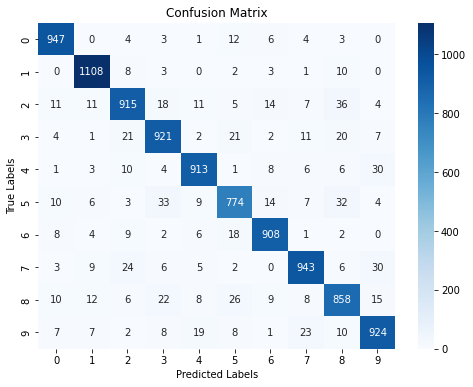

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Список названий классов
class_names = clf.classes_

# Визуализация матрицы неточностей с использованием Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# CIFAR10 dataset

In [12]:
from tensorflow.keras.datasets import cifar10

# Загрузка датасета CIFAR-10
(x_train, y_train), (X_test, y_test) = cifar10.load_data()

# Пример использования данных
print('Размеры обучающей выборки:', x_train.shape, y_train.shape)
print('Размеры тестовой выборки:', X_test.shape, y_test.shape)

Размеры обучающей выборки: (50000, 32, 32, 3) (50000, 1)
Размеры тестовой выборки: (10000, 32, 32, 3) (10000, 1)


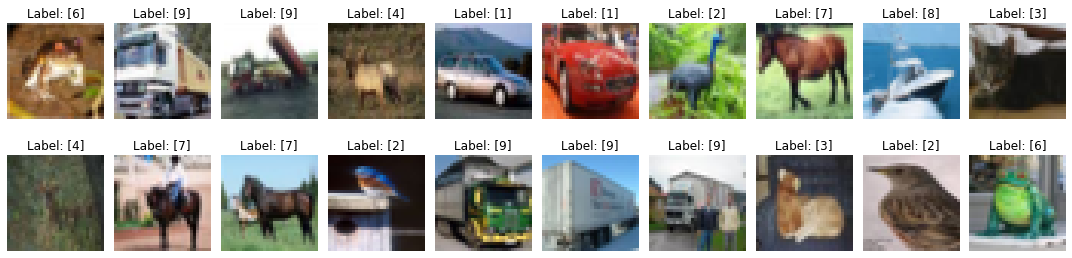

In [13]:
# Создание сетки для визуализации
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

# Заполнение сетки изображениями и метками
for i, ax in enumerate(axes.flat):
    image = x_train[i]
    label = y_train[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Решение задачи классическими алгоритмами

In [14]:
# Преобразование изображений в одномерные признаки
x_train = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
X_test = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))

y_train = y_train.flatten()
y_test = y_test.flatten()

In [15]:
# Вывод датасета
x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,57,39,41,56,36,38,53,37,39,54
49996,255,245,132,254,247,134,255,249,137,254,...,82,249,174,79,252,181,81,253,181,76
49997,35,178,235,40,176,239,42,176,241,39,...,87,27,52,77,21,43,66,12,31,50
49998,189,211,240,186,208,236,185,207,235,184,...,165,195,184,169,196,189,171,195,190,171


## Задание.

По аналогии с датасетом MNIST построить классификатор, используя изученные классические подходы (LogisticRegression/SVM, PCA) и т.д.

In [19]:
# Your code here
#
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.4038


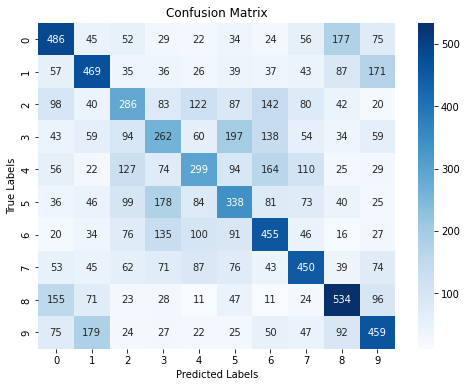

In [20]:
cm = confusion_matrix(y_test, y_pred)

# Список названий классов
class_names = clf.classes_

# Визуализация матрицы неточностей с использованием Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Решение задачи с помощью нейронной сети

### LeNet-5

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Загрузка датасета CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Предобработка данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создание модели LeNet-5
model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция и обучение модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=1024, validation_data=(x_test, y_test));

Epoch 1/10
49/49 [==============================] - 13s 238ms/step - loss: 2.0428 - accuracy: 0.2640 - val_loss: 1.8672 - val_accuracy: 0.3354
Epoch 2/10
49/49 [==============================] - 10s 207ms/step - loss: 1.7633 - accuracy: 0.3690 - val_loss: 1.6504 - val_accuracy: 0.4168
Epoch 3/10
49/49 [==============================] - 10s 197ms/step - loss: 1.5953 - accuracy: 0.4296 - val_loss: 1.5272 - val_accuracy: 0.4522
Epoch 4/10
49/49 [==============================] - 9s 193ms/step - loss: 1.5025 - accuracy: 0.4623 - val_loss: 1.4817 - val_accuracy: 0.4669
Epoch 5/10
49/49 [==============================] - 10s 204ms/step - loss: 1.4486 - accuracy: 0.4832 - val_loss: 1.4205 - val_accuracy: 0.4902
Epoch 6/10
49/49 [==============================] - 10s 214ms/step - loss: 1.3987 - accuracy: 0.4997 - val_loss: 1.3894 - val_accuracy: 0.4997
Epoch 7/10
49/49 [==============================] - 11s 218ms/step - loss: 1.3616 - accuracy: 0.5166 - val_loss: 1.3702 - val_accuracy: 0.5086


### Предобученная модель VGG16 + transfer learning

- Keras Applications https://keras.io/api/applications/

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# Загрузка датасета CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Предобработка данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Загрузка предобученной модели VGG16 без верхних слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Добавление верхних слоев для классификации
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])

# Замораживание весов базовой модели
base_model.trainable = False

# Компиляция и обучение модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 188s 240ms/step - loss: 1.6070 - accuracy: 0.4562 - val_loss: 1.4313 - val_accuracy: 0.5128
Epoch 2/10
782/782 [==============================] - 196s 250ms/step - loss: 1.3544 - accuracy: 0.5405 - val_loss: 1.3345 - val_accuracy: 0.5426
Epoch 3/10
782/782 [==============================] - 222s 284ms/step - loss: 1.2879 - accuracy: 0.5616 - val_loss: 1.2927 - val_accuracy: 0.5545
Epoch 4/10
782/782 [==============================] - 219s 280ms/step - loss: 1.2494 - accuracy: 0.5734 - val_loss: 1.2655 - val_accuracy: 0.5654
Epoch 5/10
782/782 [==============================] - 197s 252ms/step - loss: 1.2236 - accuracy: 0.5803 - val_loss: 1.2493 - val_accuracy: 0.5683
Epoch 6/10
782/782 [==============================] - 208s 267ms/step - loss: 1.2050 - accuracy: 0.5870 - val_loss: 1.2409 - val_accuracy: 0.5726
Epoch 7/10
782/782 [==============================] - 202s 258ms/step - loss: 1.1911 - accuracy: 0.5923 - val_loss: 1.2298 -

<strong>Transfer learning</strong>
<img src='https://www.researchgate.net/publication/342400905/figure/fig4/AS:905786289057792@1592967688003/The-architecture-of-our-transfer-learning-model.jpg'>

<img src='https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60ee08a4779abb22e9bb4326_timeline.png'>

<img src='https://miro.medium.com/v2/resize:fit:1078/format:webp/1*q1QRxnGxg8COheh8tWXAiw.png'>